In [1]:
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from tqdm.autonotebook import tqdm
#import pandas as pd
import mysql.connector
import codecs
codecs.register(lambda name: codecs.lookup('utf8') if name == 'utf8mb4' else None)
import re

In [2]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='pruned_commits_db2',
  charset='utf8mb4')

cur = db.cursor()

In [3]:
def yield_c():
    cur.execute('SELECT aggr_rel_pairs.id_relation, examples_bi.idx_diff \
    FROM examples_bi JOIN aggr_rel_pairs ON aggr_rel_pairs.id = examples_bi.id_rel_pair;')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()

In [3]:
import pandas as pd

In [4]:
from collections import defaultdict

In [6]:
import json

In [5]:
stats = defaultdict(lambda: defaultdict(int))

In [6]:
for pair in tqdm(yield_c()):
    stats[pair[0]][pair[1]] += 1

In [15]:
stats2 = {int(rel): {int(i):stats[rel][i] for i in stats[rel]} for rel in stats}

In [21]:
list(range(-5, 5))

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [22]:
stats3 = {
    rel: [stats[rel][i] for i in range(-100, 101)]
    for rel in stats
}

In [33]:
len(data)

412260134

In [17]:
json.dump(stats2, open('relation_stats.json', 'w'), ensure_ascii=False)

In [7]:
cur.execute('SELECT id, relation_name FROM relations;')
rels = cur.fetchall()
rels = {i[0]:i[1] for i in rels}

In [5]:
stats = json.load(open('relation_stats.json'))

In [6]:
stats2 = {int(rel): {int(i):stats[rel][i] for i in stats[rel]} for rel in stats}

In [7]:
data = [[] for i in rels]
for rel in tqdm(stats2):
    for key in stats2[rel]:
        if abs(key) <= 15:
            data[rel-1].extend([-key]*stats2[rel][key])

In [8]:
rel_labels = [rels[key] for key in sorted(rels)]

In [9]:
len(data), len(rel_labels)

(49, 49)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
bar_data = []
for row in data:
    bar_data.append([len(row)])

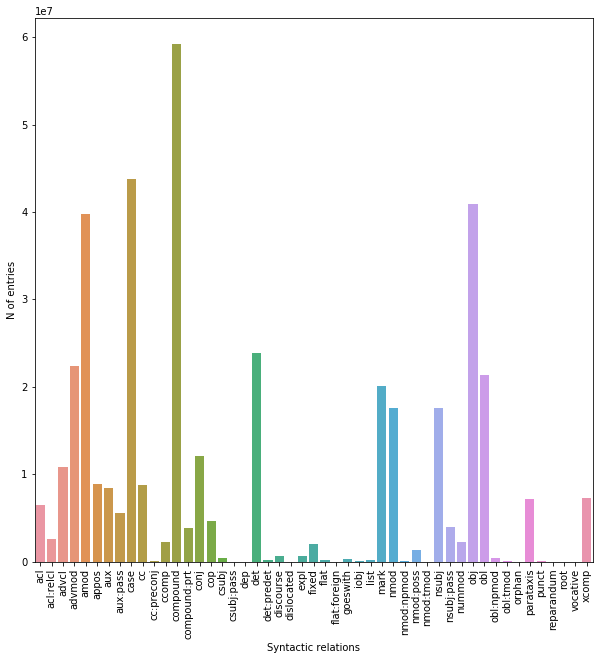

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=bar_data)
plt.xticks(plt.xticks()[0], rel_labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N of entries')
plt.xlabel('Syntactic relations');

In [13]:
for key, i in enumerate(data):
    print(key+1, rel_labels[key], len(i))

1 acl 6525696
2 acl:relcl 2591185
3 advcl 10864251
4 advmod 22412465
5 amod 39802630
6 appos 8907632
7 aux 8476414
8 aux:pass 5553420
9 case 43739940
10 cc 8779072
11 cc:preconj 130074
12 ccomp 2225824
13 compound 59208198
14 compound:prt 3845250
15 conj 12081367
16 cop 4697851
17 csubj 481420
18 csubj:pass 0
19 dep 0
20 det 23886556
21 det:predet 184465
22 discourse 655482
23 dislocated 0
24 expl 658819
25 fixed 2019576
26 flat 158312
27 flat:foreign 2279
28 goeswith 351499
29 iobj 69698
30 list 241245
31 mark 20064606
32 nmod 17534126
33 nmod:npmod 58624
34 nmod:poss 1393544
35 nmod:tmod 8951
36 nsubj 17539854
37 nsubj:pass 3972006
38 nummod 2240641
39 obj 40968701
40 obl 21307636
41 obl:npmod 462438
42 obl:tmod 121442
43 orphan 0
44 parataxis 7220764
45 punct 60708
46 reparandum 16
47 root 0
48 vocative 12669
49 xcomp 7248733


Text(0.5, 0, 'Relative position')

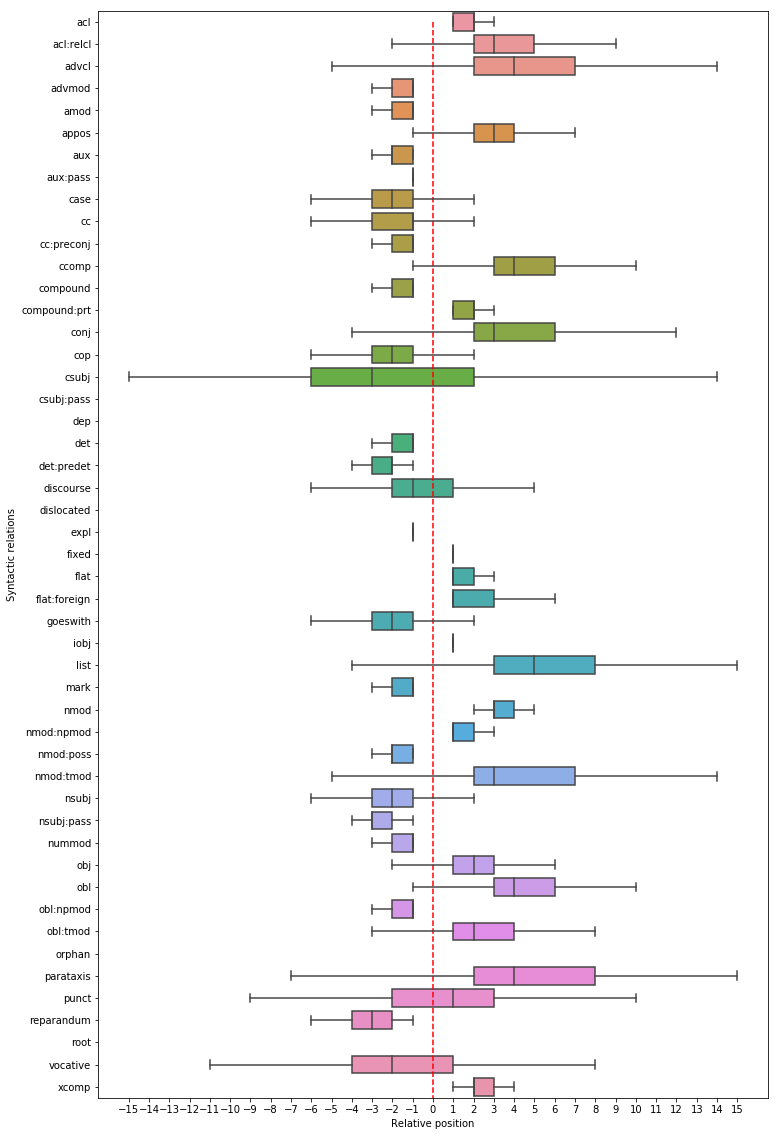

In [14]:
fig, ax = plt.subplots(figsize=(12, 20))
sns.boxplot(data=data, showfliers=False, orient="h")
plt.yticks(plt.yticks()[0], rel_labels);
plt.xticks(list(range(-15, 16)));
#ax.tick_params(axis='y', rotation=90);
plt.vlines(0, 0, 49, colors=['red'], linestyles='dashed')
plt.ylabel('Syntactic relations')
plt.xlabel('Relative position')

## compare first and next

In [9]:
rels_rev = {rels[key]: 0 for key in rels}

In [10]:
for line in open('/home/dkbrz/git_commits/rel/2plus_0.txt'):
    rel = line.rstrip().split()
    for i in rel:
        rels_rev[i] += 1

In [11]:
del rels_rev['root'], rels_rev['punct']

In [12]:
total = sum(rels_rev[key] for key in rels_rev)
total

180613725

In [13]:
rels_rev2 = {rels[key]: 0 for key in rels}

In [14]:
for line in open('/home/dkbrz/git_commits/rel/2plus_next.txt'):
    rel = line.rstrip().split()
    for i in rel:
        rels_rev2[i] += 1

In [15]:
del rels_rev2['root'], rels_rev2['punct']

In [16]:
total = sum(rels_rev2[key] for key in rels_rev2)
total

534529961

In [17]:
rels_rev0 = {rels[key]: 0 for key in rels}
for line in open('/home/dkbrz/git_commits/rel/one_sentence_rel.txt'):
    rel = line.rstrip().split()
    for i in rel:
        rels_rev0[i] += 1
del rels_rev0['root'], rels_rev0['punct']
total = sum(rels_rev0[key] for key in rels_rev0)
total

214296932

In [18]:
! wc -l /home/dkbrz/git_commits/rel/2plus_0.txt /home/dkbrz/git_commits/rel/2plus_next.txt /home/dkbrz/git_commits/rel/one_sentence_rel.txt

  30239075 /home/dkbrz/git_commits/rel/2plus_0.txt
  73878520 /home/dkbrz/git_commits/rel/2plus_next.txt
  42918407 /home/dkbrz/git_commits/rel/one_sentence_rel.txt
 147036002 total


In [19]:
import conllu

In [20]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='twitter_db',
  charset='utf8mb4')

cur = db.cursor()

def yield_c():
    cur.execute('SELECT conllu FROM C')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()

rels_rev_T = {rels[key]: 0 for key in rels}
for item in yield_c():
    parsed = conllu.parse(item[0])
    for sent in parsed:
        for word in sent:
            rels_rev_T[word['deprel']] += 1
del rels_rev_T['root'], rels_rev_T['punct']

total = sum(rels_rev_T[key] for key in rels_rev_T)
total

4539371

In [77]:
total = 214296932
data1 = [('Sole', key, rels_rev0[key]/total) for key in sorted(rels_rev0, key=rels_rev_T.get, reverse=True)][:30]

total = 180613725#257761639
data1 += [('First', key, rels_rev[key]/total) for key in sorted(rels_rev, key=rels_rev_T.get, reverse=True)][:30]

total = 534529961#791099453
data1 += [('Second', key, rels_rev2[key]/total) for key in sorted(rels_rev2, key=rels_rev_T.get, reverse=True)][:30]

total = 4539371
data1 += [('Twitter', key, rels_rev_T[key]/total) for key in sorted(rels_rev_T, key=rels_rev_T.get, reverse=True)][:30]

In [78]:
data = pd.DataFrame(data1)
data.columns = ['Position', 'Relation', 'Share']

In [79]:
rel_labels = data.Relation.values[:30]

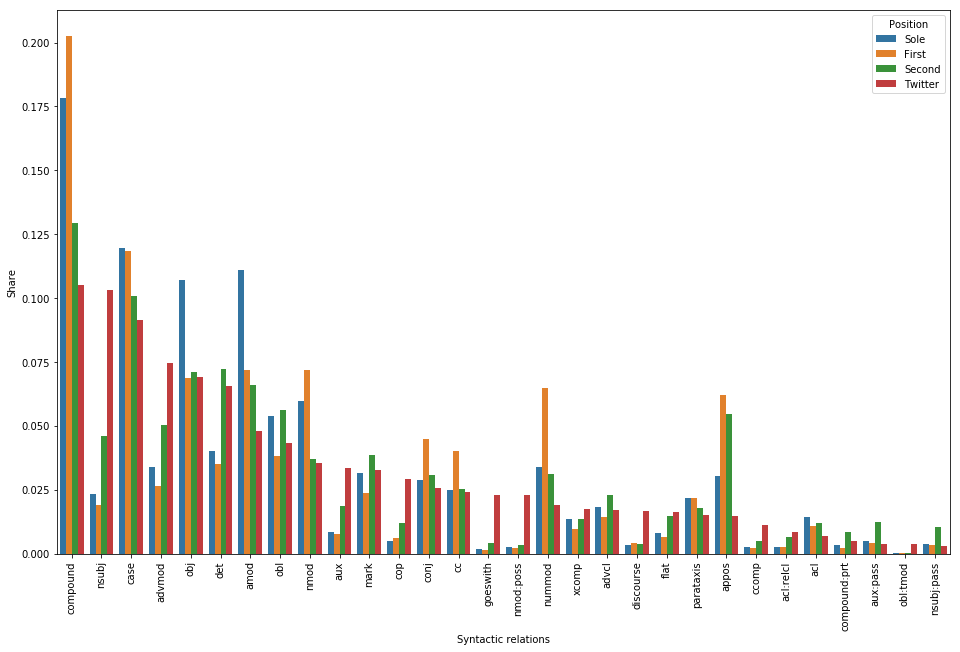

In [82]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(y='Share', x='Relation', hue='Position', data=data)
plt.xticks(plt.xticks()[0], rel_labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('Share')
plt.xlabel('Syntactic relations');

In [28]:
total = 214296932
data1 = [[rels_rev0[key]/total for key in sorted(rels_rev0, key=rels_rev0.get, reverse=True)][:30]]
total = 180613725#257761639
data1 += [[rels_rev[key]/total for key in sorted(rels_rev, key=rels_rev0.get, reverse=True)][:30]]
total = 534529961#791099453
data1 += [[rels_rev2[key]/total for key in sorted(rels_rev2, key=rels_rev0.get, reverse=True)][:30]]
total = 4539371
data1 += [[rels_rev_T[key]/total for key in sorted(rels_rev_T, key=rels_rev0.get, reverse=True)][:30]]

In [32]:
df = pd.DataFrame(data1).T
df['Names'] = [key for key in sorted(rels_rev_T, key=rels_rev0.get, reverse=True)][:30]
df.columns = ['Sole', 'First', 'Second', 'Twitter', 'Names']

In [34]:
from scipy.stats import spearmanr

In [41]:
rho, pval = spearmanr(df[['Sole', 'First', 'Second', 'Twitter']])

In [45]:
pval

array([[0.00000000e+00, 6.09569272e-18, 2.91557560e-16, 4.70431494e-06],
       [6.09569272e-18, 0.00000000e+00, 6.41748747e-12, 5.22810649e-05],
       [2.91557560e-16, 6.41748747e-12, 0.00000000e+00, 1.75634021e-06],
       [4.70431494e-06, 5.22810649e-05, 1.75634021e-06, 0.00000000e+00]])

In [46]:
rho

array([[1.        , 0.96573971, 0.95461624, 0.72992214],
       [0.96573971, 1.        , 0.90522803, 0.66941046],
       [0.95461624, 0.90522803, 1.        , 0.75083426],
       [0.72992214, 0.66941046, 0.75083426, 1.        ]])

In [50]:
import numpy as np

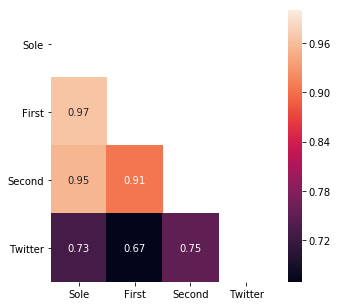

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
mask = np.zeros_like(rho)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(rho, annot=True, mask=mask, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])
ax.tick_params(axis='y', rotation=0);

In [68]:
total = 214296932
data1 = [[rels_rev0[key]/total for key in sorted(rels_rev0, key=rels_rev0.get, reverse=True)][:30]]
total = 180613725#257761639
data1 += [[rels_rev[key]/total for key in sorted(rels_rev, key=rels_rev.get, reverse=True)][:30]]
total = 534529961#791099453
data1 += [[rels_rev2[key]/total for key in sorted(rels_rev2, key=rels_rev2.get, reverse=True)][:30]]
total = 4539371
data1 += [[rels_rev_T[key]/total for key in sorted(rels_rev_T, key=rels_rev_T.get, reverse=True)][:30]]
df = pd.DataFrame(data1).T
df['Names'] = [key for key in sorted(rels_rev_T, key=rels_rev0.get, reverse=True)][:30]
df.columns = ['Sole', 'First', 'Second', 'Twitter', 'Names']

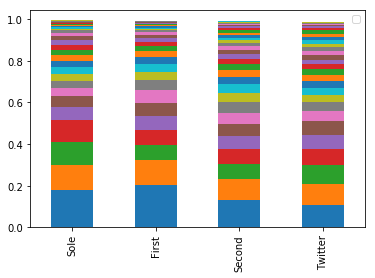

In [74]:
df[df.columns[:-1]].T.plot.bar(stacked=True, label='_nolegend_' )
plt.legend([]);

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(y='Share', x='Relation', hue='Position', data=data)
plt.xticks(plt.xticks()[0], rel_labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('Share')
plt.xlabel('Syntactic relations');

## <br><br><br> emoticons and days of the week

In [6]:
import datetime

In [30]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='small_commits_db',
  charset='utf8mb4')

cur = db.cursor()

def yield_c():
    cur.execute('SELECT text, date FROM C;')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()                                                                              

In [13]:
datetime.datetime.now().hour

17

In [14]:
by_year = defaultdict(int)
by_month = defaultdict(int)
by_day = defaultdict(int)
by_weekday = defaultdict(int)
by_hour = defaultdict(int)

for item in tqdm(yield_c()):
    date = datetime.datetime.strptime(item[1], '%Y-%m-%d %H:%M:%S')
    by_year[date.year] += 1
    by_month[date.month] += 1
    by_day[date.day] += 1
    by_weekday[date.weekday()] += 1
    by_hour[date.hour] += 1

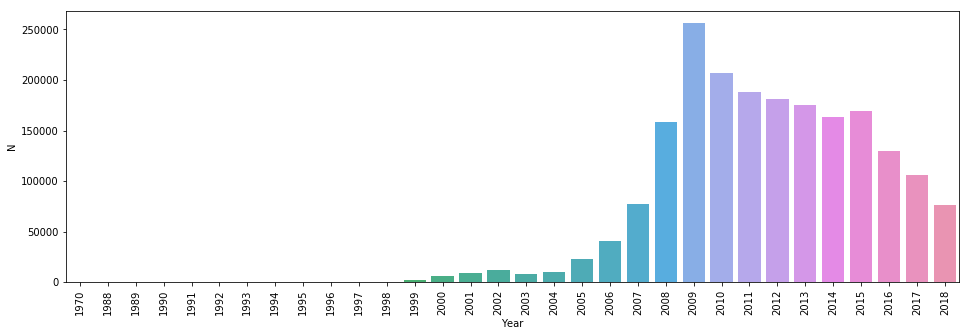

In [15]:
bars = [by_year[key] for key in sorted(by_year)]
labels = [key for key in sorted(by_year)]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Year');

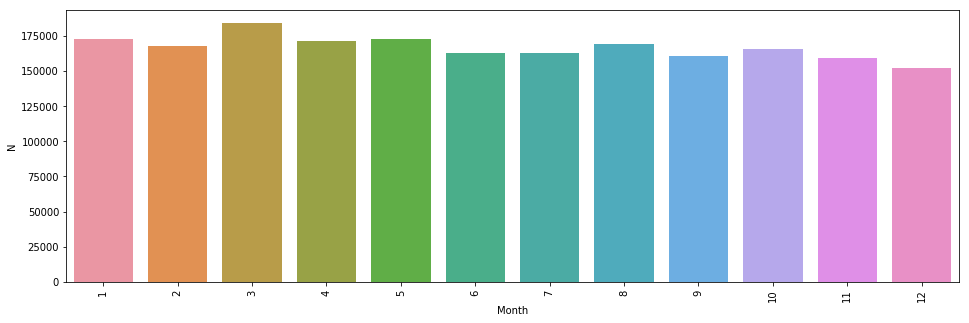

In [16]:
bars = [by_month[key] for key in sorted(by_month)]
labels = [key for key in sorted(by_month)]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Month');

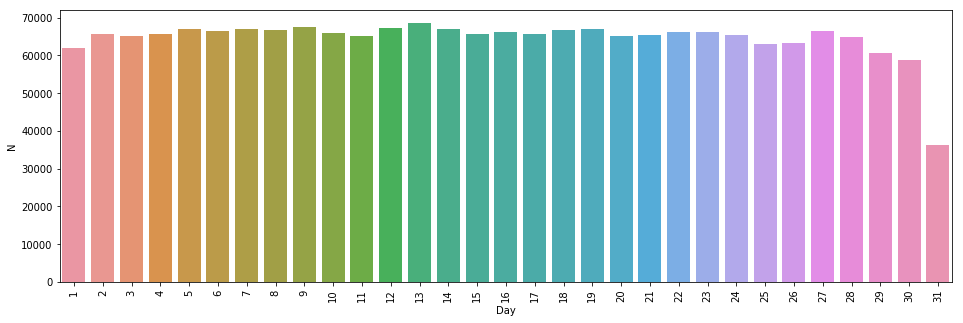

In [17]:
bars = [by_day[key] for key in sorted(by_day)]
labels = [key for key in sorted(by_day)]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Day');

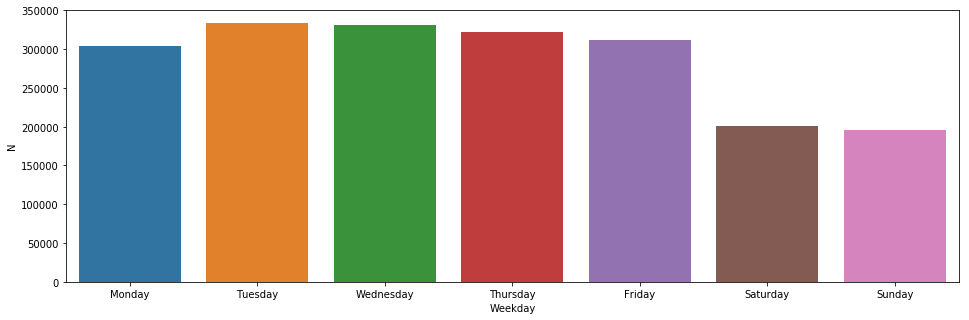

In [18]:
bars = [by_weekday[key] for key in sorted(by_weekday)]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Weekday');

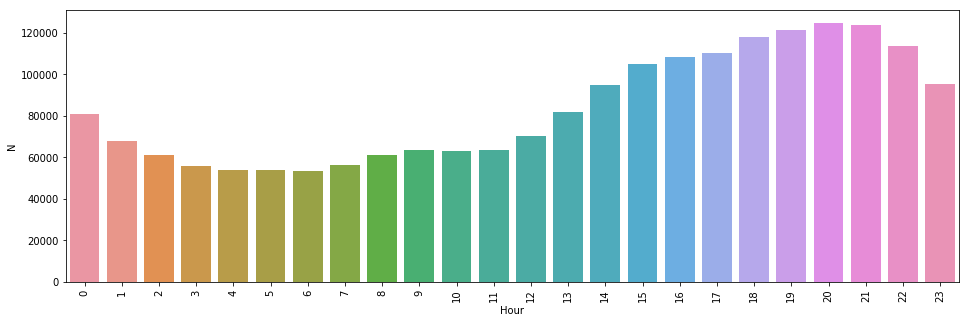

In [20]:
bars = [by_hour[key] for key in sorted(by_hour)]
labels = [key for key in sorted(by_hour)]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Hour');

In [28]:
by_year_ = defaultdict(lambda: {
    ':)':0, ':(':0, ':-)':0, ':-(':0,  ';)':0, ';(':0, ';-)':0, ';-(':0, '=)':0, '=(':0}
                      )
by_month_ = defaultdict(lambda: {
    ':)':0, ':(':0, ':-)':0, ':-(':0,  ';)':0, ';(':0, ';-)':0, ';-(':0, '=)':0, '=(':0}
                      )
by_day_ = defaultdict(lambda: {
    ':)':0, ':(':0, ':-)':0, ':-(':0,  ';)':0, ';(':0, ';-)':0, ';-(':0, '=)':0, '=(':0}
                      )
by_weekday_ = defaultdict(lambda: {
    ':)':0, ':(':0, ':-)':0, ':-(':0,  ';)':0, ';(':0, ';-)':0, ';-(':0, '=)':0, '=(':0}
                      )
by_hour_ = defaultdict(lambda: {
    ':)':0, ':(':0, ':-)':0, ':-(':0,  ';)':0, ';(':0, ';-)':0, ';-(':0, '=)':0, '=(':0}
                      )

In [29]:
emot = set([':)', ':(', ':-)', ':-(',  ';)', ';(', ';-)', ';-(', '=)', '=('])

In [31]:
by_year = defaultdict(int)
by_month = defaultdict(int)
by_day = defaultdict(int)
by_weekday = defaultdict(int)
by_hour = defaultdict(int)

for item in tqdm(yield_c()):
    date = datetime.datetime.strptime(item[1], '%Y-%m-%d %H:%M:%S')
    by_year[date.year] += 1
    by_month[date.month] += 1
    by_day[date.day] += 1
    by_weekday[date.weekday()] += 1
    by_hour[date.hour] += 1
    for e in emot:
        if e in item[0]:
            by_year_[date.year][e] += 1
            by_month_[date.month][e] += 1
            by_day_[date.day][e] += 1
            by_weekday_[date.weekday()][e] += 1
            by_hour_[date.hour][e] += 1

In [32]:
by_year = dict(by_year)
by_month = dict(by_month)
by_day = dict(by_day)
by_weekday = dict(by_weekday)
by_hour = dict(by_hour)

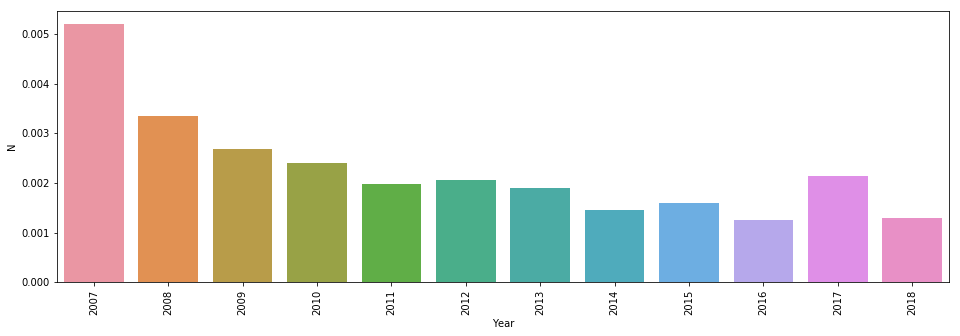

In [33]:
bars = [sum(by_year_[key][e] for e in by_year_[key])/by_year[key] for key in sorted(by_year_)][-12:]
labels = [key for key in sorted(by_year_)][-12:]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Year');

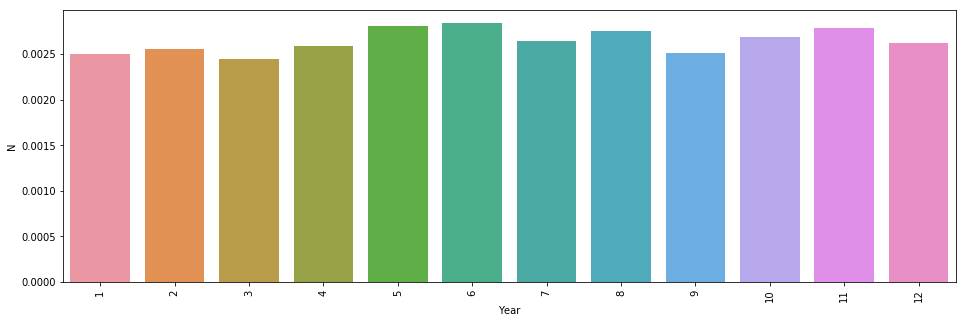

In [34]:
bars = [sum(by_month_[key][e] for e in by_month_[key])/by_month[key] for key in sorted(by_month_)]#[-10:]
labels = [key for key in sorted(by_month_)]#[-10:]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Year');

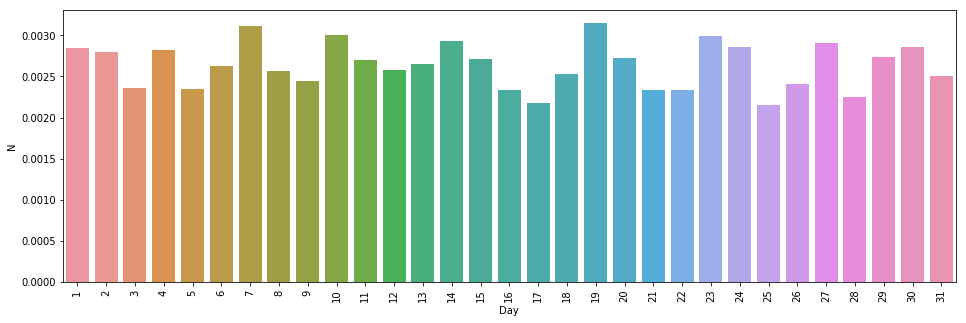

In [35]:
bars = [sum(by_day_[key][e] for e in by_day_[key])/by_day[key] for key in sorted(by_day_)]#[-10:]
labels = [key for key in sorted(by_day_)]#[-10:]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Day');

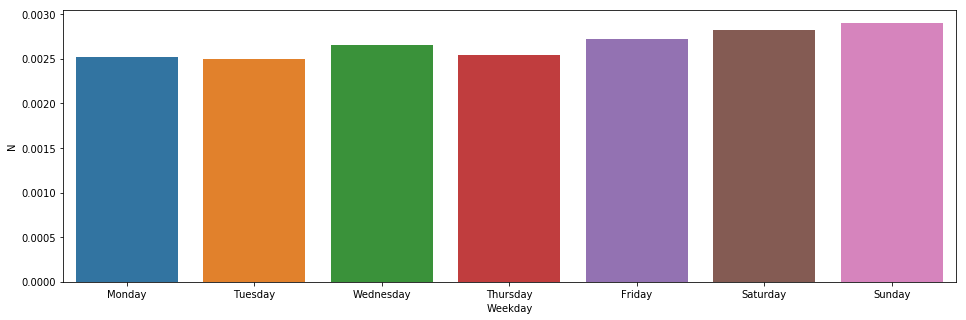

In [36]:
bars = [sum(by_weekday_[key][e] for e in by_weekday_[key])/by_weekday[key] for key in sorted(by_weekday_)]#[-10:]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Weekday');

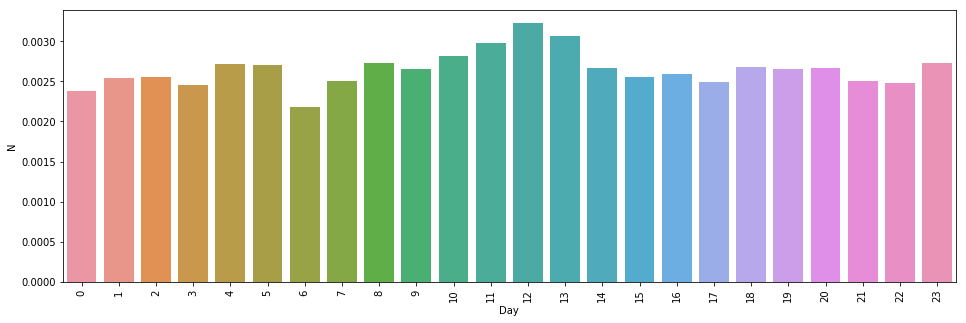

In [38]:
bars = [sum(by_hour_[key][e] for e in by_hour_[key])/by_hour[key] for key in sorted(by_hour_)]#[-10:]
labels = [key for key in sorted(by_hour_)]#[-10:]

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=bars, x=labels, orient='v')
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Day');

pairwise

In [39]:
mapping = {':)':'+', ':(':'-', ':-)':'+', ':-(':'-',  ';)':'+', ';(':'-', ';-)':'+', ';-(':'-', '=)':'+', '=(':'-'}

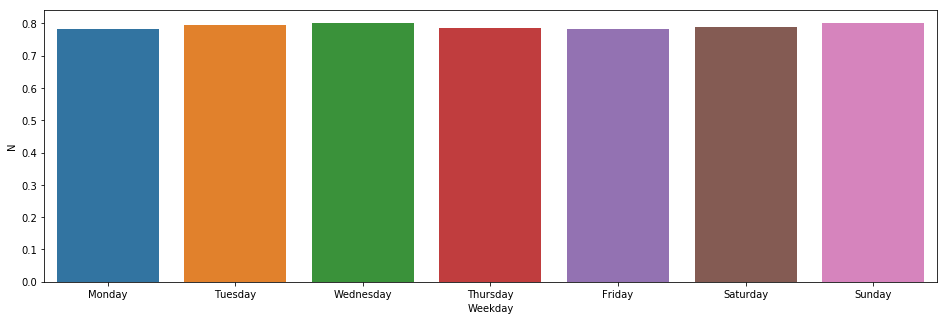

In [40]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
second_labels = []
for wd in sorted(by_weekday_):
    res = {'+':0, '-':0}
    for e in by_weekday_[wd]:
        res[mapping[e]] += by_weekday_[wd][e]
    #second_labels.append((wd, '+', res['+'])) 
    #second_labels.append((wd, '-', res['-'])) 
    second_labels.append((wd, res['+']/(res['+']+res['-'])))
df = pd.DataFrame(second_labels)
df.columns = ['Weekday', 'N']
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y='N', x='Weekday', orient='v', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Weekday');

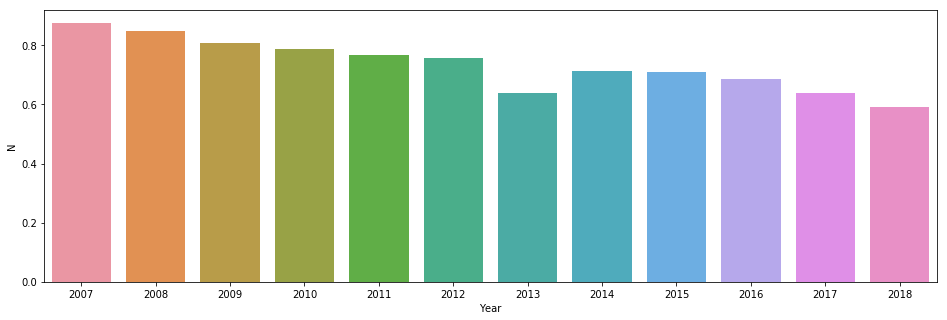

In [41]:
second_labels = []
labels = [key for key in sorted(by_year_)][-12:]
for wd in sorted(by_year_):
    res = {'+':0, '-':0}
    for e in by_year_[wd]:
        res[mapping[e]] += by_year_[wd][e]
    #second_labels.append((wd, '+', res['+'])) 
    #second_labels.append((wd, '-', res['-'])) 
    second_labels.append((wd, res['+']/(res['+']+res['-'])))
df = pd.DataFrame(second_labels[-12:])
df.columns = ['Weekday', 'N']
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y='N', x='Weekday', orient='v', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Year');

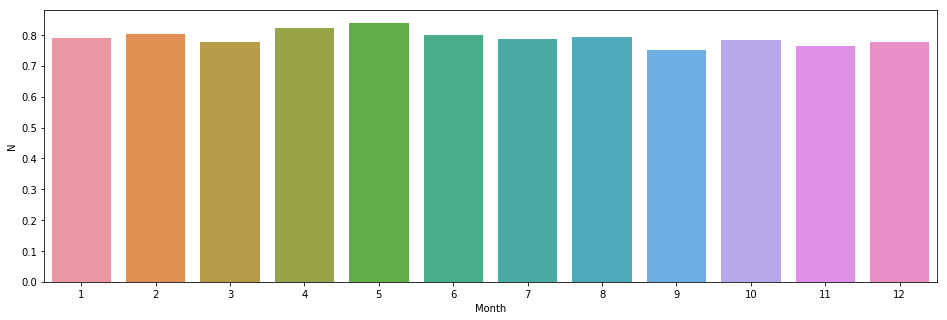

In [43]:
second_labels = []
labels = [key for key in sorted(by_month_)]#[-10:]
for wd in sorted(by_month_):
    res = {'+':0, '-':0}
    for e in by_month_[wd]:
        res[mapping[e]] += by_month_[wd][e]
    second_labels.append((wd, res['+']/(res['+']+res['-'])))
df = pd.DataFrame(second_labels)
df.columns = ['Weekday', 'N']
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y='N', x='Weekday', orient='v', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Month');

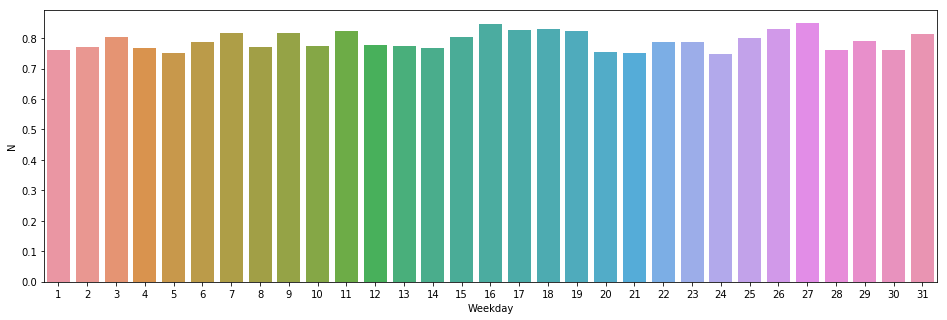

In [44]:
second_labels = []
labels = [key for key in sorted(by_day_)]#[-10:]
for wd in sorted(by_day_):
    res = {'+':0, '-':0}
    for e in by_month_[wd]:
        res[mapping[e]] += by_day_[wd][e]
    #second_labels.append((wd, '+', res['+'])) 
    #second_labels.append((wd, '-', res['-'])) 
    second_labels.append((wd, res['+']/(res['+']+res['-'])))
df = pd.DataFrame(second_labels)
df.columns = ['Weekday', 'N']
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y='N', x='Weekday', orient='v', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Weekday');

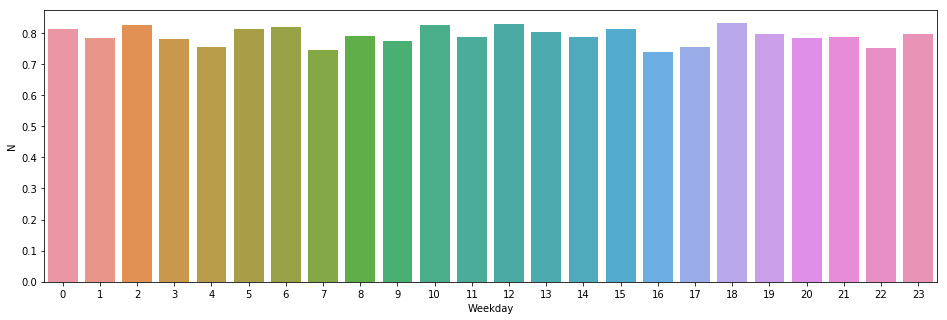

In [45]:
second_labels = []
labels = [key for key in sorted(by_hour_)]#[-10:]
for wd in sorted(by_hour_):
    res = {'+':0, '-':0}
    for e in by_hour_[wd]:
        res[mapping[e]] += by_hour_[wd][e]
    #second_labels.append((wd, '+', res['+'])) 
    #second_labels.append((wd, '-', res['-'])) 
    second_labels.append((wd, res['+']/(res['+']+res['-'])))
df = pd.DataFrame(second_labels)
df.columns = ['Weekday', 'N']
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y='N', x='Weekday', orient='v', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=0);
plt.ylabel('N')
plt.xlabel('Weekday');

## <br><br><br> root

In [49]:
import conllu
import re

In [99]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='small_commits_db',
  charset='utf8mb4')

cur = db.cursor()

def yield_c():
    cur.execute('SELECT conllu, date FROM C')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()                                                                              

In [100]:
by_year = defaultdict(lambda: [0, 0, 0, 0])
by_month = defaultdict(lambda: [0, 0, 0, 0])
by_day = defaultdict(lambda: [0, 0, 0, 0])
by_weekday = defaultdict(lambda: [0, 0, 0, 0])
by_hour = defaultdict(lambda: [0, 0, 0, 0])

by_year_ = defaultdict(lambda: {'NOUN':0, 'VERB':0, 'other': 0})
by_month_ = defaultdict(lambda: {'NOUN':0, 'VERB':0, 'other': 0})
by_day_ = defaultdict(lambda: {'NOUN':0, 'VERB':0, 'other': 0})
by_weekday_ = defaultdict(lambda: {'NOUN':0, 'VERB':0, 'other': 0})
by_hour_ = defaultdict(lambda: {'NOUN':0, 'VERB':0, 'other': 0})

for item in tqdm(yield_c()):
    ln = len(re.findall('sent_id', item[0]))
    if ln == 1:
        date = datetime.datetime.strptime(item[1], '%Y-%m-%d %H:%M:%S')
        con = conllu.parse(item[0])
        for i in con[0]:
            if i['deprel'] == 'root':
                if i['upostag'] in ('NOUN', 'VERB'):
                    by_year_[date.year][i['upostag']] += 1
                    by_month_[date.month][i['upostag']] += 1
                    by_day_[date.day][i['upostag']] += 1
                    by_weekday_[date.weekday()][i['upostag']] += 1
                    by_hour_[date.hour][i['upostag']] += 1
                else:
                    by_year_[date.year]['other'] += 1
                    by_month_[date.month]['other'] += 1
                    by_day_[date.day]['other'] += 1
                    by_weekday_[date.weekday()]['other'] += 1
                    by_hour_[date.hour]['other'] += 1
                break
    by_year[date.year][0] += 1
    by_month[date.month][0] += 1
    by_day[date.day][0] += 1
    by_weekday[date.weekday()][0] += 1
    by_hour[date.hour][0] += 1
    
    by_year[date.year][min(ln, 2) + 1] += 1
    by_month[date.month][min(ln, 2) + 1] += 1
    by_day[date.day][min(ln, 2) + 1] += 1
    by_weekday[date.weekday()][min(ln, 2) + 1] += 1
    by_hour[date.hour][min(ln, 2) + 1] += 1

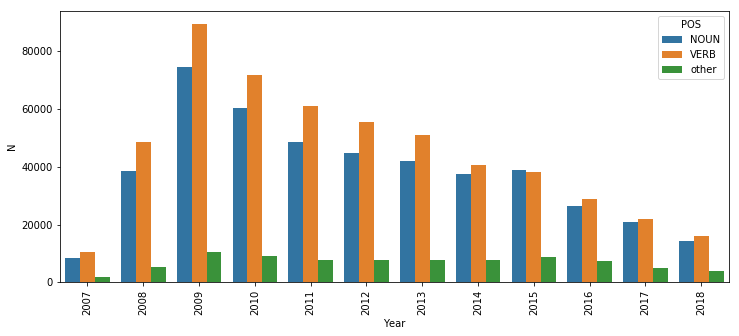

In [110]:
data = []
labels = [key for key in sorted(by_year_)][-12:]
#print(labels)
for year in sorted(by_year_):
    for pos in by_year_[year]:
        data.append((year, pos, by_year_[year][pos],))
df = pd.DataFrame(data[-36:])
df.columns = ['Year', 'POS', 'N']
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='N', x='Year', hue='POS', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Year');

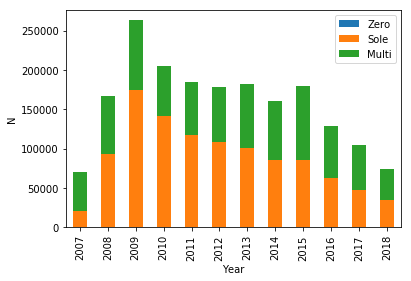

In [113]:
data = []
labels = [key for key in sorted(by_year)][-12:]
for year in sorted(by_year):
    data.append(by_year[year][1:])
df = pd.DataFrame(data[-12:])
df.columns = ['Zero', 'Sole', 'Multi']
df.plot.bar(stacked=True)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Year');

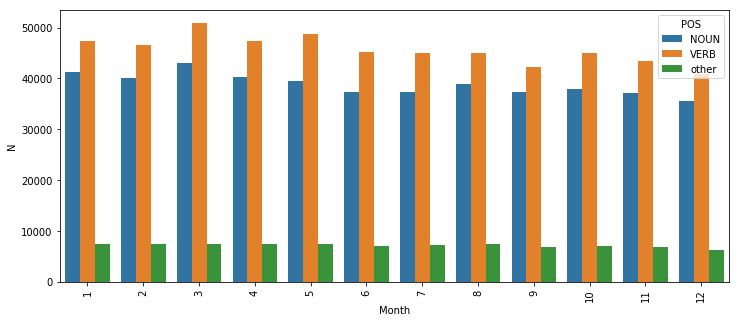

In [114]:
data = []
labels = [key for key in sorted(by_month_)]
for year in by_month_:
    for pos in by_month_[year]:
        data.append((year, pos, by_month_[year][pos],))
df = pd.DataFrame(data)
df.columns = ['Month', 'POS', 'N']
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='N', x='Month', hue='POS', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Month');

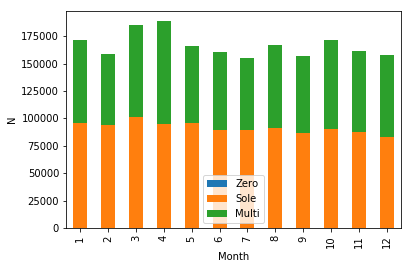

In [115]:
data = []
labels = [key for key in sorted(by_month)]
for year in sorted(by_month):
    data.append(by_month[year][1:])
df = pd.DataFrame(data)
df.columns = ['Zero', 'Sole', 'Multi']
df.plot.bar(stacked=True)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Month');

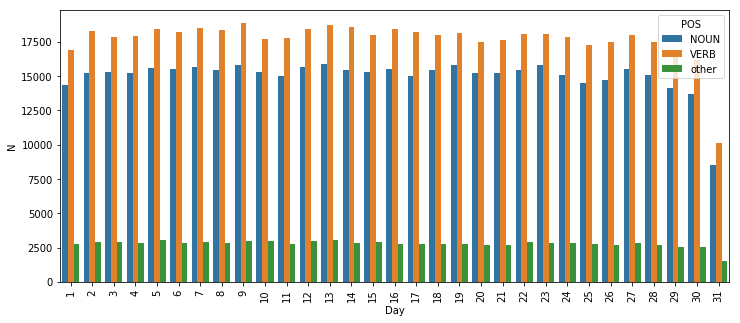

In [116]:
data = []
labels = [key for key in sorted(by_day_)]
for year in by_day_:
    for pos in by_day_[year]:
        data.append((year, pos, by_day_[year][pos],))
df = pd.DataFrame(data)
df.columns = ['Day', 'POS', 'N']
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='N', x='Day', hue='POS', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Day');

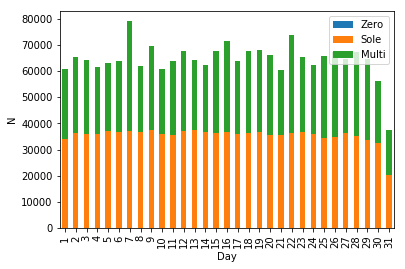

In [117]:
data = []
labels = [key for key in sorted(by_day)]
for year in sorted(by_day):
    data.append(by_day[year][1:])
df = pd.DataFrame(data)
df.columns = ['Zero', 'Sole', 'Multi']
df.plot.bar(stacked=True)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Day');

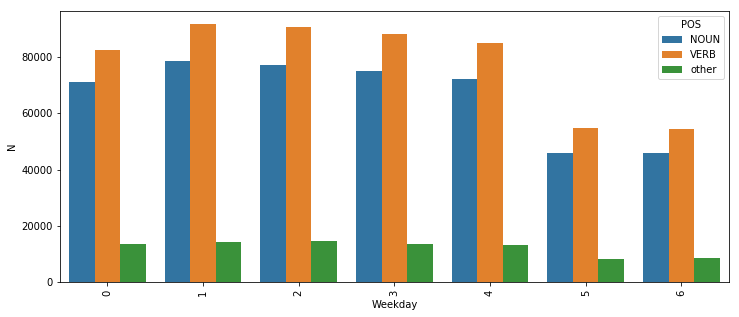

In [118]:
data = []
labels = [key for key in sorted(by_weekday_)]
for year in by_weekday_:
    for pos in by_weekday_[year]:
        data.append((year, pos, by_weekday_[year][pos],))
df = pd.DataFrame(data)
df.columns = ['Weekday', 'POS', 'N']
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='N', x='Weekday', hue='POS', data=df)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Weekday');

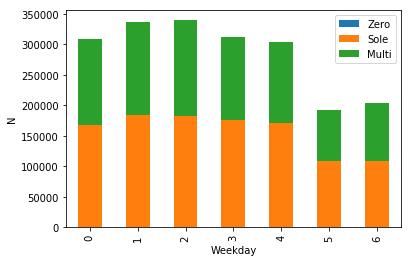

In [119]:
data = []
labels = [key for key in sorted(by_weekday)]
for year in sorted(by_weekday):
    data.append(by_weekday[year][1:])
df = pd.DataFrame(data)
df.columns = ['Zero', 'Sole', 'Multi']
df.plot.bar(stacked=True)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N')
plt.xlabel('Weekday');